Basic level. My KNN Algorithm trial.

In [44]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

In [45]:
#import libraries for pandas profiling
# Detailing for pandas profiling: https://github.com/pandas-profiling/pandas-profiling
from pathlib import Path
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

In [46]:
diabetes = pd.read_csv("../input/diabetes/diabetes_data.csv")
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
#Profiling: we can see our dataset details,simply.
profile = ProfileReport(diabetes, title="diabetes")
# The Notebook Widgets Interface
profile.to_widgets()

# **Basic EDA and statistical analysis**

In [48]:
# gives information about the data types,columns, null value counts, memory usage etc
diabetes.info()
diabetes.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [49]:
# basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
diabetes.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [50]:
diabetes.describe().T
#dpf = DiabetesPedigreeFunction

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
diastolic,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
triceps,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
dpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Following columns or variables have an invalid zero value:

* Glucose
* BloodPressure = diastolic
* Triceps =SkinThickness
* Insulin
* BMI 

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [51]:
diabetes_copy = diabetes.copy(deep=True)
diabetes_copy[['glucose','diastolic','triceps','insulin','bmi']] = diabetes_copy[['glucose','diastolic','triceps','insulin','bmi']].replace(0,np.NaN)
# showing the count of Nans
print(diabetes_copy.isnull().sum())

pregnancies      0
glucose          5
diastolic       35
triceps        227
insulin        374
bmi             11
dpf              0
age              0
diabetes         0
dtype: int64


To fill these Nan values the data distribution needs to be understood

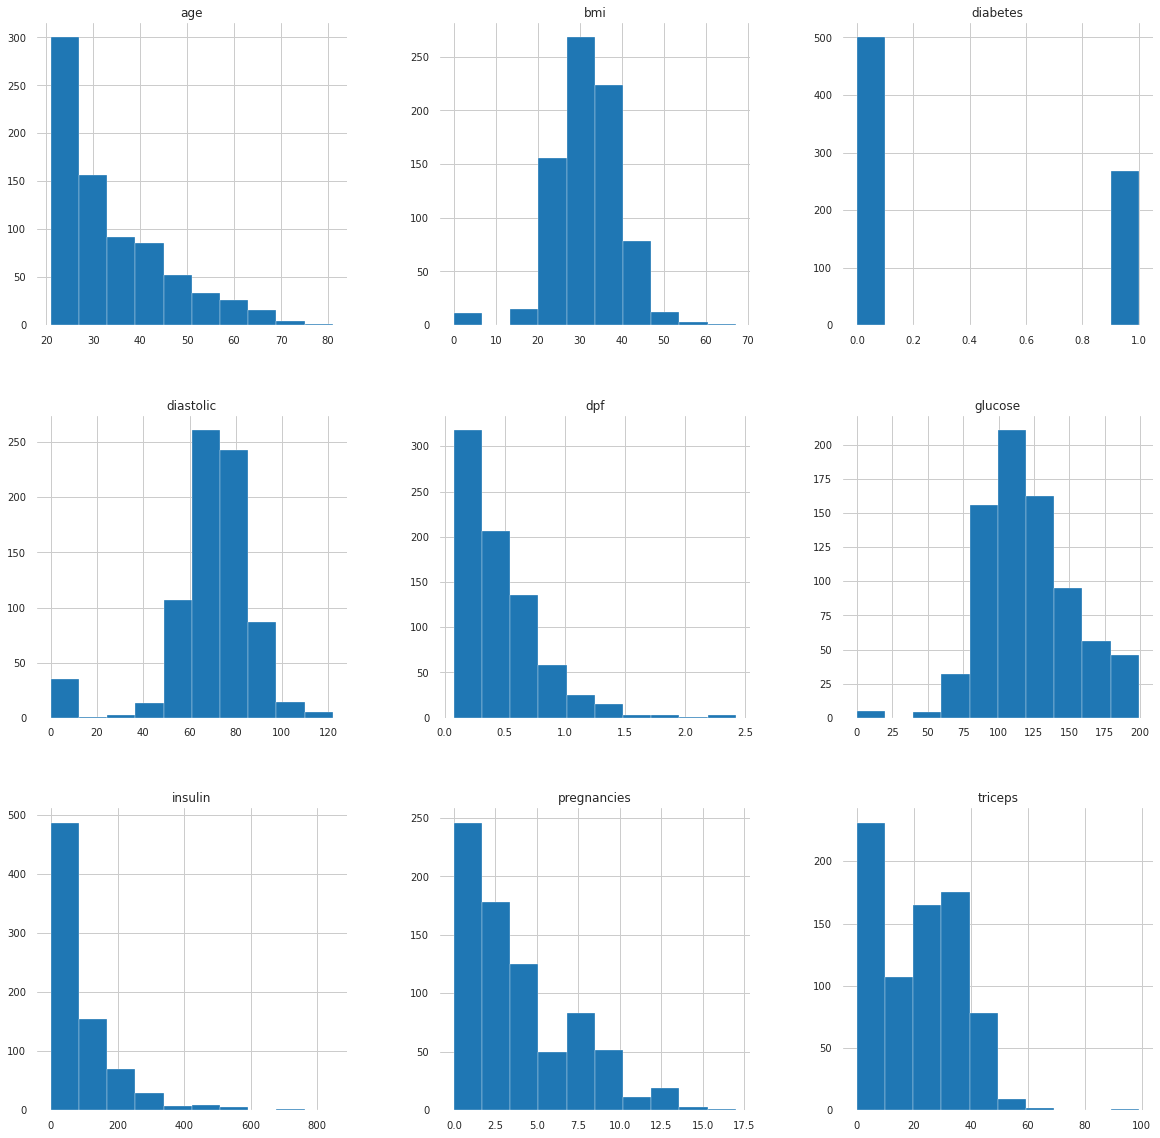

In [52]:
his = diabetes.hist(figsize=(20,20))

nan values accordance with their distribution in the columns.

In [53]:
#'glucose','diastolic','triceps','insulin','bmi'
diabetes_copy["glucose"].fillna(diabetes_copy["glucose"].mean(), inplace=True)
diabetes_copy["diastolic"].fillna(diabetes_copy["diastolic"].mean(), inplace=True)
diabetes_copy["triceps"].fillna(diabetes_copy["triceps"].median(), inplace=True)
diabetes_copy["insulin"].fillna(diabetes_copy["insulin"].median(), inplace=True)
diabetes_copy["bmi"].fillna(diabetes_copy["bmi"].median(), inplace=True)

# Plotting after NaN regulation

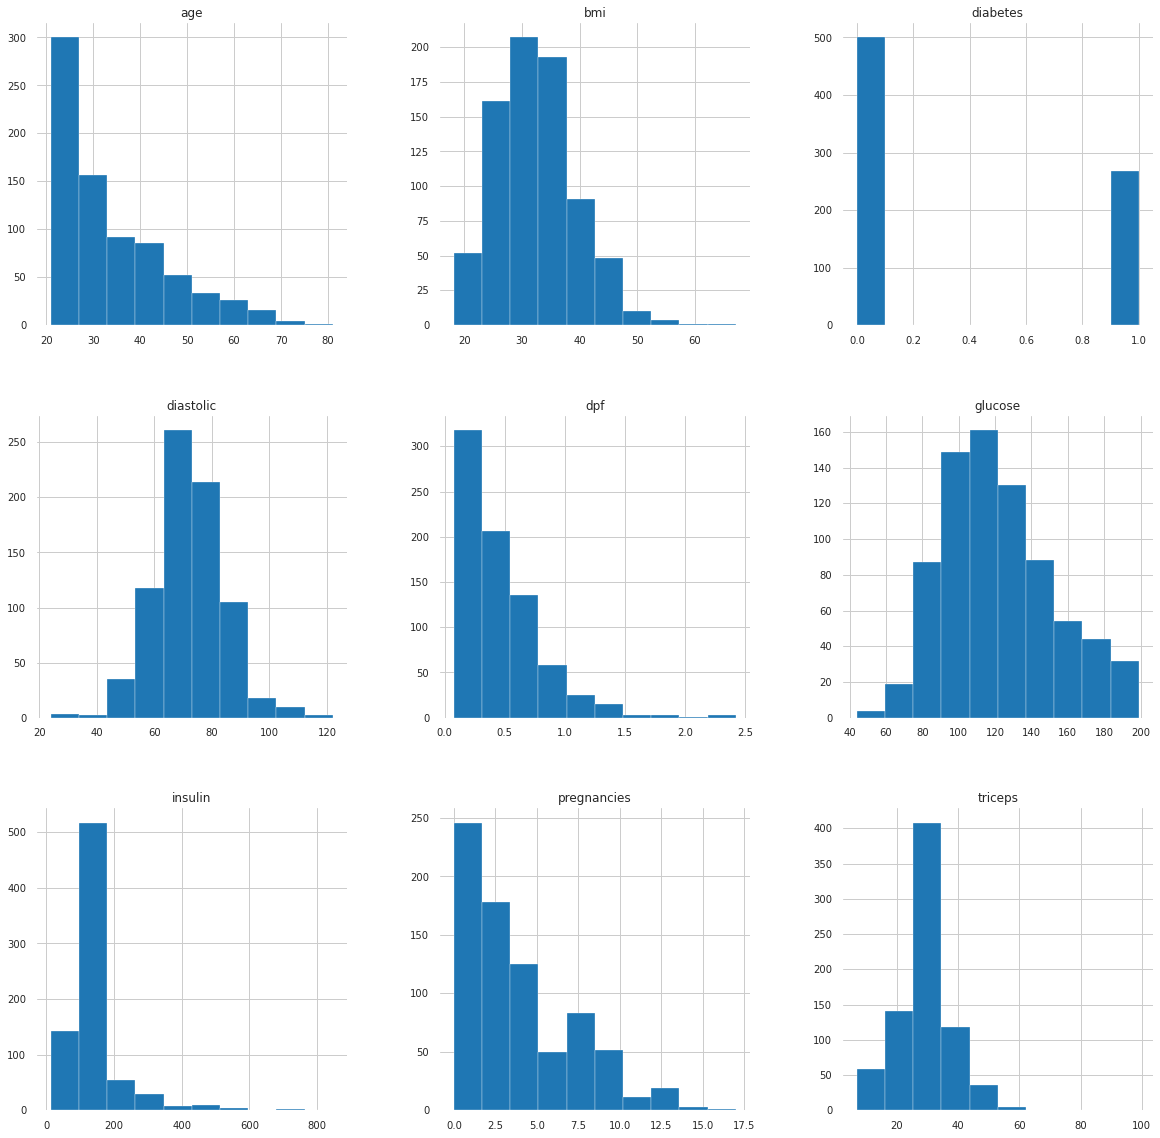

In [54]:
his = diabetes_copy.hist(figsize=(20,20))

Scatter matrix of raw data

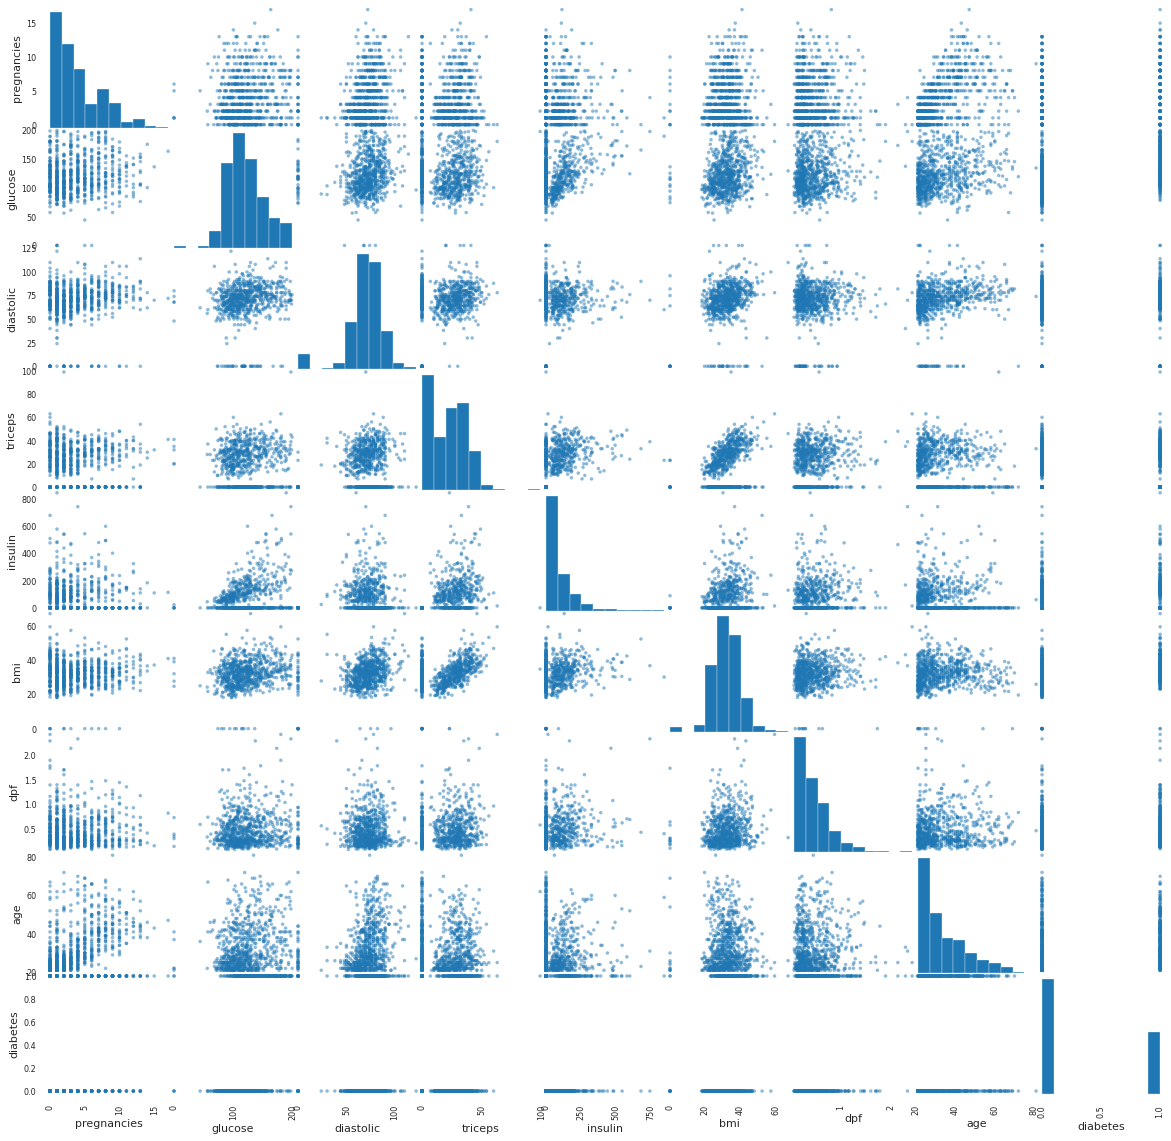

In [55]:
from pandas.plotting import scatter_matrix
p = scatter_matrix(diabetes,figsize=(20,20))

Pair plot for clean data
Scatter matrix for clean data

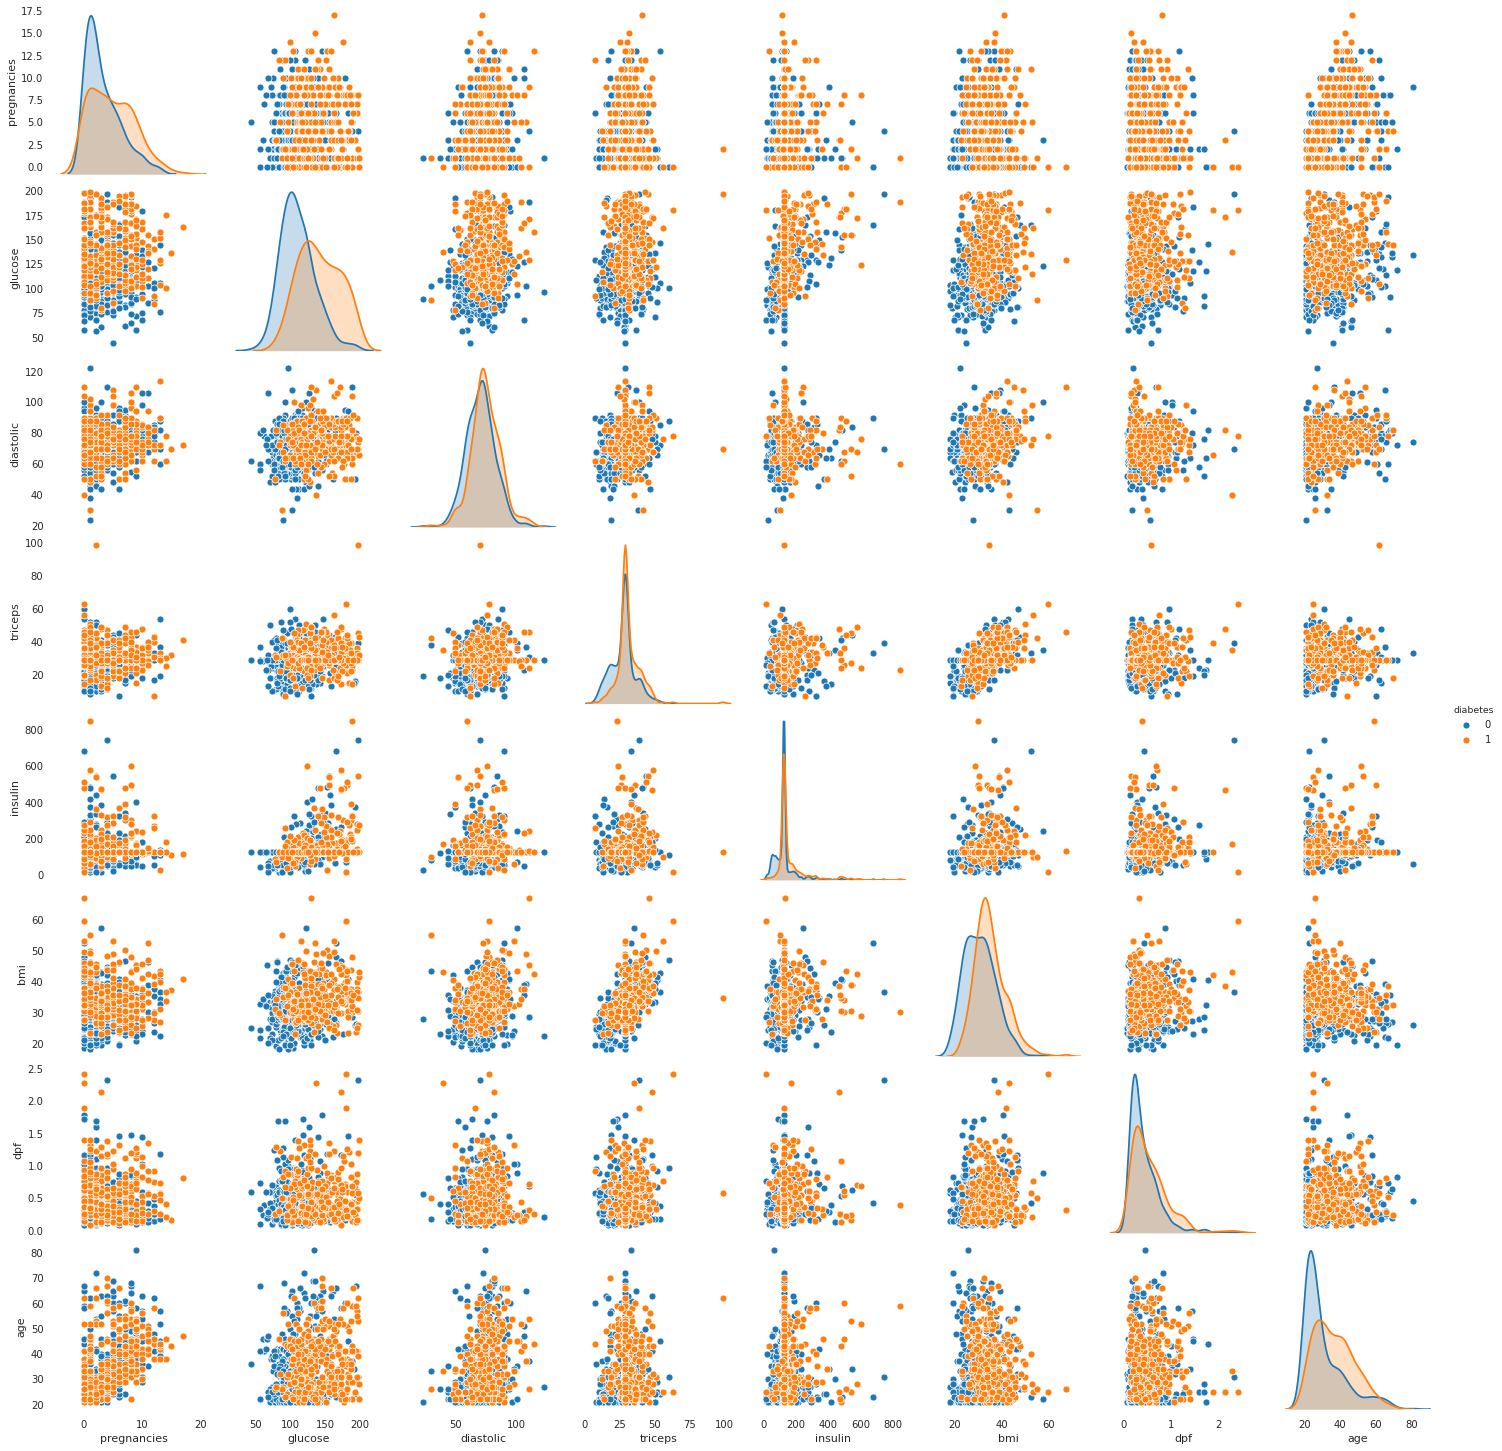

In [56]:
#from pandas.plotting import scatter_matrix
#p = scatter_matrix(diabetes_copy,figsize=(20,20))
p = sns.pairplot(diabetes_copy, hue="diabetes")

# Pearson's Correlation Coefficient

Heatmap for unclean data

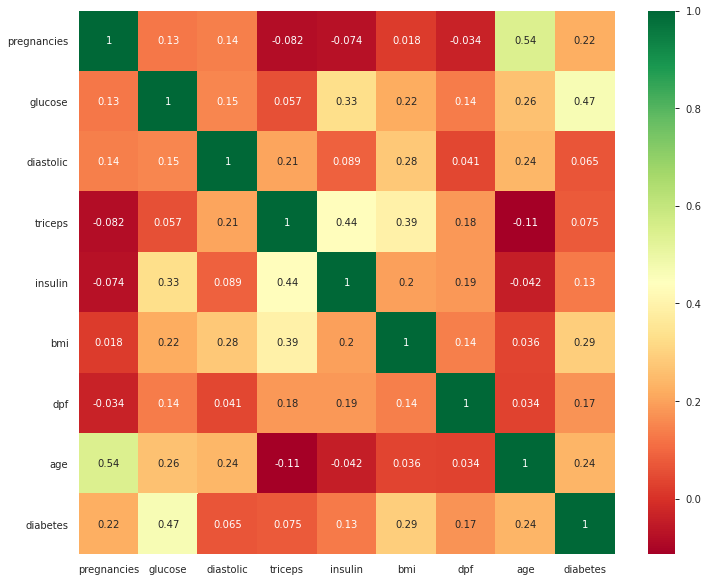

In [57]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='RdYlGn')

Heatmap for clean data

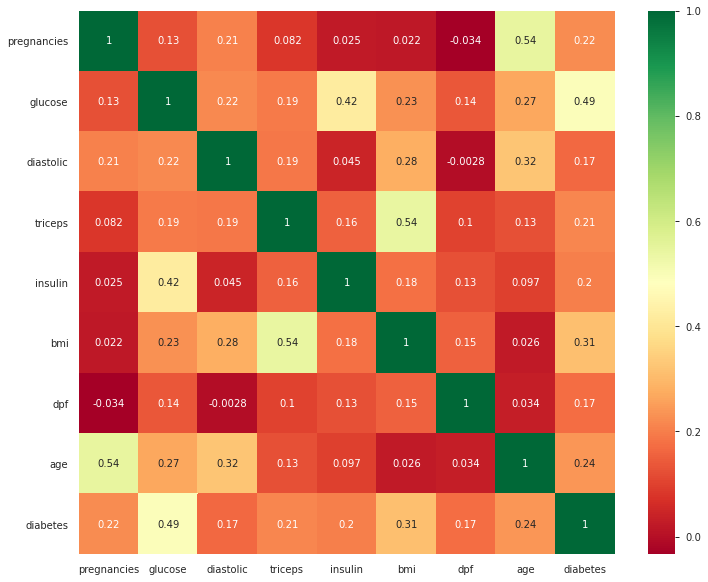

In [58]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(diabetes_copy.corr(), annot=True,cmap ='RdYlGn') 

Scaling the data

In [59]:
from sklearn.preprocessing import StandardScaler
St_sc = StandardScaler()
X = pd.DataFrame(St_sc.fit_transform(diabetes_copy.drop(["diabetes"],axis=1)),columns=["pregnancies","glucose",
                                                                                      "diastolic","triceps","insulin","bmi","dpf","age"])
y = diabetes_copy.diabetes


In [60]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


TRAIN-TEST SPLIT

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)
#Train Test Split data==> 70% of data set for Train, 30% of data set for Test

KNN Fit-Prediction with an number of K

In [62]:
# Create a k-NN classifier
knn = KNeighborsClassifier(n_neighbors = 6, metric= "manhattan")
# Fit the classifier to the training data
knn.fit(X_train,y_train)
#PREDICTION
print("Prediction of features (test set): ",knn.predict(X_test))
print("Actual label variables: (test set)",y_test)
#ACCURACY
# Print the accuracy
print(knn.score(X_test, y_test))


Prediction of features (test set):  [0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 1 0]
Actual label variables: (test set) 730    1
198    1
24     1
417    1
387    1
      ..
94     0
437    0
86     0
221    1
19     1
Name: diabetes, Length: 231, dtype: int64
0.7402597402597403


KNN Fit-Predict with different numbers of k

In [63]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [64]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k, metric= "manhattan")
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)


In [65]:
max_train_score = max(train_accuracy)
train_scores_ind = [i for i, v in enumerate(train_accuracy) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [66]:
max_test_score = max(test_accuracy)
test_scores_ind = [i for i, v in enumerate(test_accuracy) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 77.48917748917748 % and k = [12]


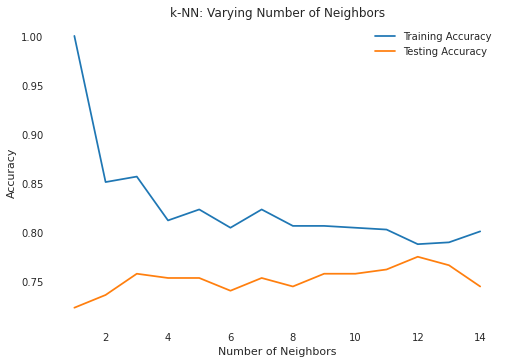

In [67]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [68]:
#The best result is captured at k = 12
knn = KNeighborsClassifier(12, metric= "manhattan")

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7748917748917749

# Model Performance Analysis

1. Confusion Matrix

In [69]:
#import confusion matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_predict = knn.predict(X_test)
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test,y_predict,rownames=["True"],colnames=["Predicted"],margins=True)

Predicted,0,1,All
True,,,
0,137,13,150
1,39,42,81
All,176,55,231


Text(0.5, 25.0, 'Predicted label')

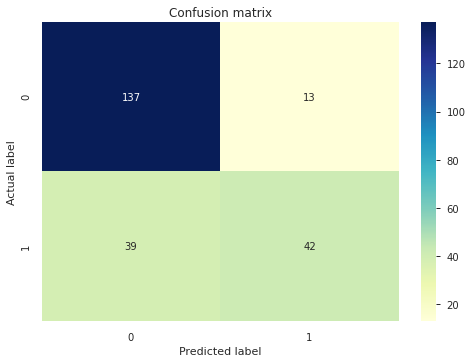

In [70]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

2. Classification Report
Report which includes Precision, Recall and F1-Score

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       150
           1       0.76      0.52      0.62        81

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



3. ROC - AUC

In [72]:
from sklearn.metrics import roc_curve
y_predict_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict_prob)

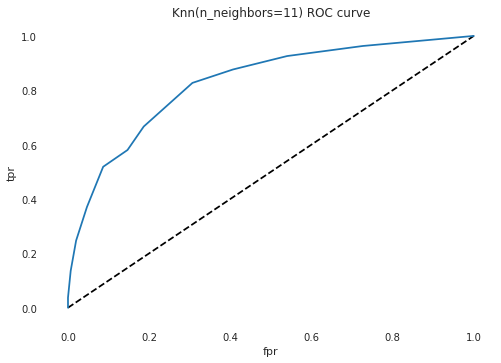

In [73]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [74]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predict_prob)

0.8265843621399176